## R语言基础
<https://github.com/byaxb/RDataAnalytics>
1. 控制流
    + 顺序
    + 条件
       + ifelse
    + 循环 
        + break next
        + for
        + while
        + repeat
2. 函数

---
#### 控制流

In [1]:
#每一个同学都有多科成绩
#语文
yw <- c(94, 87, 92, 91, 85, 92)
#数学
sx <- c(82, 94, 79, 84, 92, 82)
#外语
wy <- c(96, 89, 86, 96, 82, 85)
(yw_mean <- mean(yw)) # 平均分
sd(yw) # 标准差
(1/(6-1) * sum((yw-yw_mean)^2))^0.5
yw >=90

[1] 90.16667

[1] 3.430258

[1] 3.430258

[1]  TRUE FALSE  TRUE  TRUE FALSE  TRUE

In [2]:
min_score <- min(yw)
if(min_score){
    message("very good")
}else if(min_score >= 80){
    message("good")
}else{
    message("bad")
}

very good



In [3]:
ifelse(yw >= 90,"good","bad")

[1] "good" "bad"  "good" "good" "bad"  "good"

In [4]:
ifelse(yw >= 90,"good",ifelse(yw >= 80,"bad","very bad"))

[1] "good" "bad"  "good" "good" "bad"  "good"

In [5]:
n_fib <- 16
(fib <- numeric(n_fib))
fib[1:2] <- c(1,1)
(l_num <- 3:n_fib)
for(i in l_num){
    fib[i] <- fib[i-1]+fib[i-2]
    show(fib[i])
}

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1]  3  4  5  6  7  8  9 10 11 12 13 14 15 16

[1] 2
[1] 3
[1] 5
[1] 8
[1] 13
[1] 21
[1] 34
[1] 55
[1] 89
[1] 144
[1] 233
[1] 377
[1] 610
[1] 987


In [6]:
fib <- c(1,1)
#tail(fib)
while(sum(tail(fib,2)) < 1000){
    fib_t <- sum(fib[length(fib)], fib[length(fib)-1])
    fib <- c(fib, fib_t)
}
fib

[1]   1   1   2   3   5   8  13  21  34  55  89 144 233 377 610 987

In [7]:
fib <- c(1,1)
repeat {
    if(sum(tail(fib,2)) >= 1000){
        break
    }
    fib <- c(fib, sum(tail(fib,2)))
}
fib

[1]   1   1   2   3   5   8  13  21  34  55  89 144 233 377 610 987

+ 只要穿行模式不是必须的，本轮循环不受上一轮影响，采用并行模式

In [8]:
x <- 1:1e8
y <- 2:(1e8+1)
z <- integer(1e8)
system.time(z <- x+y,gcFirst=T)

   user  system elapsed 
  0.546   0.605   1.151 

In [9]:
if(F){
     system.time({
        for (i in 1:1e8){
            z[i] <- x[i] + y[i]
        }
    },gcFirst=T)   
}

In [ ]:
if(T){
     system.time({
         sapply(1:1e8,function(i){
             z[i] <- x[i] + y[i]
         })
    },gcFirst=T)   
}

In [ ]:
n_fib <- 16
sapply(1:n_fib, function(x) {
    1 / sqrt(5) *
        (((1 + sqrt(5)) / 2) ^ x -
             ((1 - sqrt(5)) / 2) ^ x)
})

In [ ]:
library(pbapply)
pbsapply(1:n_fib, function(x) {
    1 / sqrt(5) *
        (((1 + sqrt(5)) / 2) ^ x -
             ((1 - sqrt(5)) / 2) ^ x)
})


----
#### 函数

In [46]:
my_function <- function(x,y){
  message("I am interface")
  UseMethod("my_function",y) # 通过x标签类型确定执行函数
}
my_function.addXY <- function(x,y){
  return(x+y)
}
my_function.multiplyXY <- function(x,y){
  return(x*y)
}
my_function.default <- function(x,y){
  return(x-y)
}
x<-9
y<-5
my_function(x,y) # default 4
class(x) <- "addXY"
my_function(x,y) # addXY 14
class(x) <- "multiplyXY"
my_function(x,y) # multiplyXY 45
class(y) <- "multiplyXY"
my_function(x,y) # multiplyXY 45

I am interface



[1] 4

I am interface



[1] 4
attr(,"class")
[1] "addXY"

I am interface



[1] 4
attr(,"class")
[1] "multiplyXY"

I am interface



[1] 45
attr(,"class")
[1] "multiplyXY"

In [32]:
"!" <- function(x){
    system(x,intern=T)
}
cmd_1 <- !"ls"
cmd_1

[1] "data"                   "learn_case"             "linux_bash.ipynb"      
 [4] "linux_basic.ipynb"      "linux_nano.sh"          "linux_network.ipynb"   
 [7] "linux_process.ipynb"    "linux_user_group.ipynb" "python_oop.ipynb"      
[10] "r_basic.ipynb"          "r_data_object.ipynb"    "r_graphich.ipynb"      
[13] "smaple.tmp"

In [1]:
"+.onlyFirst" <- function(a,b){
  return(a[1]+b[1])
}
a <- 1:5
b <- 6:10
a+b # 7  9 11 13 15
"+"(a,b) # 7  9 11 13 15

class(a) <- "onlyFirst"
a+b # 7  
"+"(a,b) # 7

class(a) <- NULL
class(b) <- "onlyFirst"
a+b # 7  
"+"(a,b) # 7

class(a) <- "onlyFirst"
class(b) <- "onlyFirst"
a+b # 7  
"+"(a,b) # 7

[1]  7  9 11 13 15

[1]  7  9 11 13 15

[1] 7

[1] 7

[1] 7

[1] 7

[1] 7

[1] 7

In [54]:
methods("+")
library("ggplot2")
methods("+")

[1] +.Date        +.gg*         +.glue*       +.POSIXt      +.vctrs_vctr*
see '?methods' for accessing help and source code

[1] +.Date        +.gg*         +.glue*       +.POSIXt      +.vctrs_vctr*
see '?methods' for accessing help and source code

<https://blog.csdn.net/qq_43407763/article/details/91652918>
#### apply
对矩阵、数据框、数组(二维、多维)等矩阵型数据，按行或列应用函数FUN进行循环计算，并以返回计算结果
+ X:数组、矩阵、数据框等矩阵型数据
+ MARGIN: 按行计算或按按列计算，1表示按行，2表示按列
+ FUN: 自定义的调用函数

x,y
1,12
11,32
21,52
31,72
41,92
51,112


[1] "matrix"

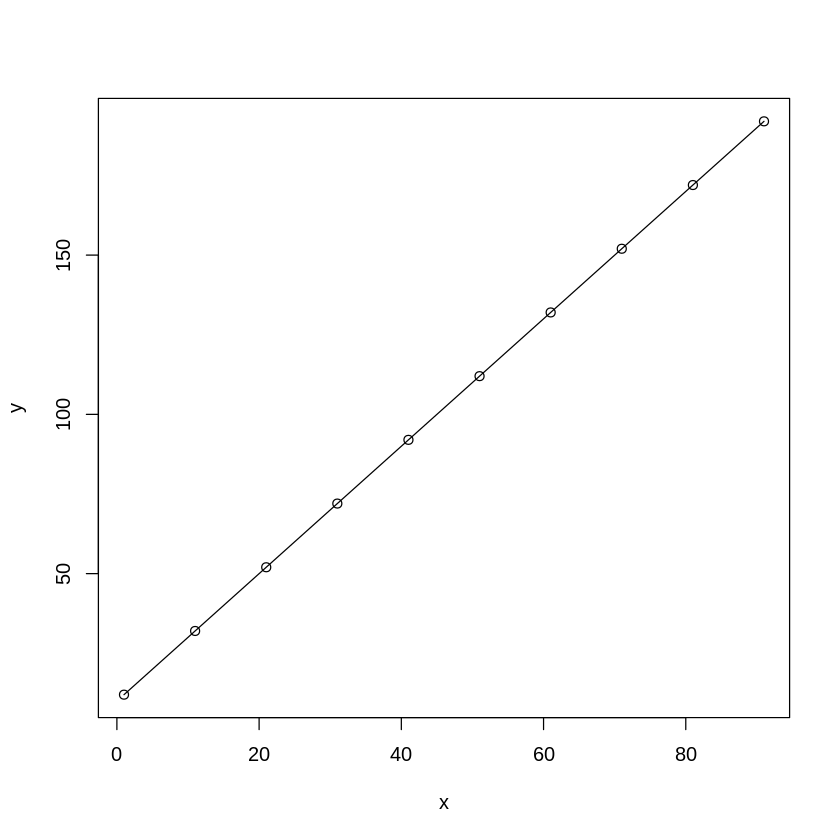

In [56]:
x <- seq(1,100,by=10)
y <- 2*x+10
xy <- cbind(x,y)
head(xy)
class(xy)
plot(xy,type='o')

[1] "lm"

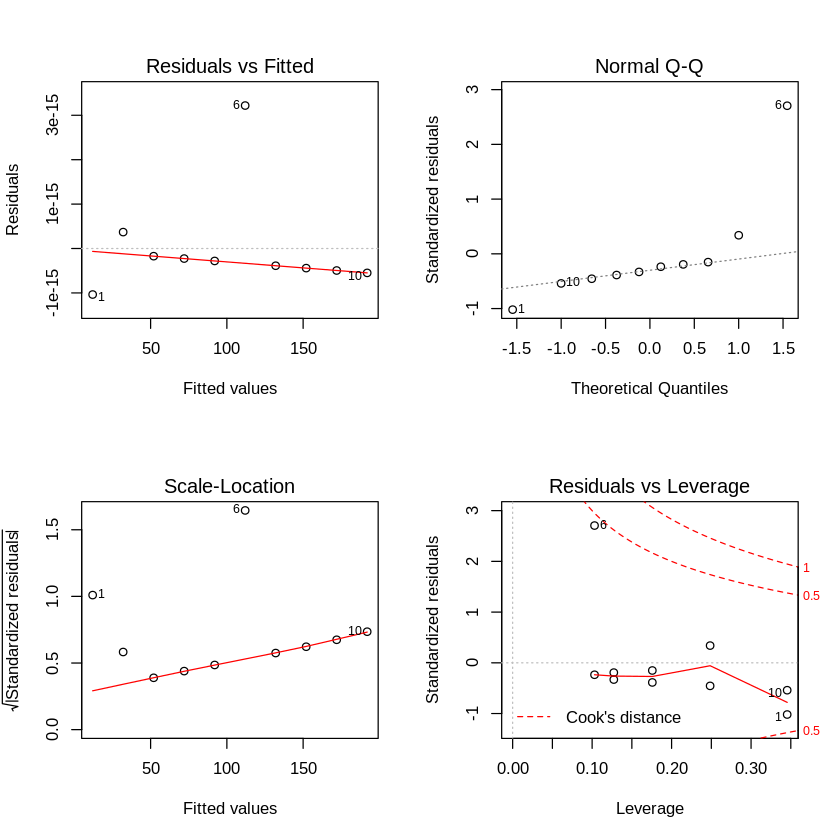

In [57]:
my_model <- lm(y~x)
class(my_model)
op <- par(mfrow=c(2,2))
plot(my_model)
par(op)

[1] "/root/linux_tutorial"

,xm,bj,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,周黎,1101,女,94,82,96,97,97,98,95,94,88,文科
2,汤海明,1101,男,87,94,89,95,94,94,90,90,89,文科
3,舒江辉,1101,男,92,79,86,98,95,96,89,94,87,文科
4,翁柯,1101,女,91,84,96,93,97,94,82,90,83,文科
5,祁强,1101,男,85,92,82,93,87,88,95,94,93,文科
6,湛容,1101,女,92,82,85,91,90,92,82,98,90,文科


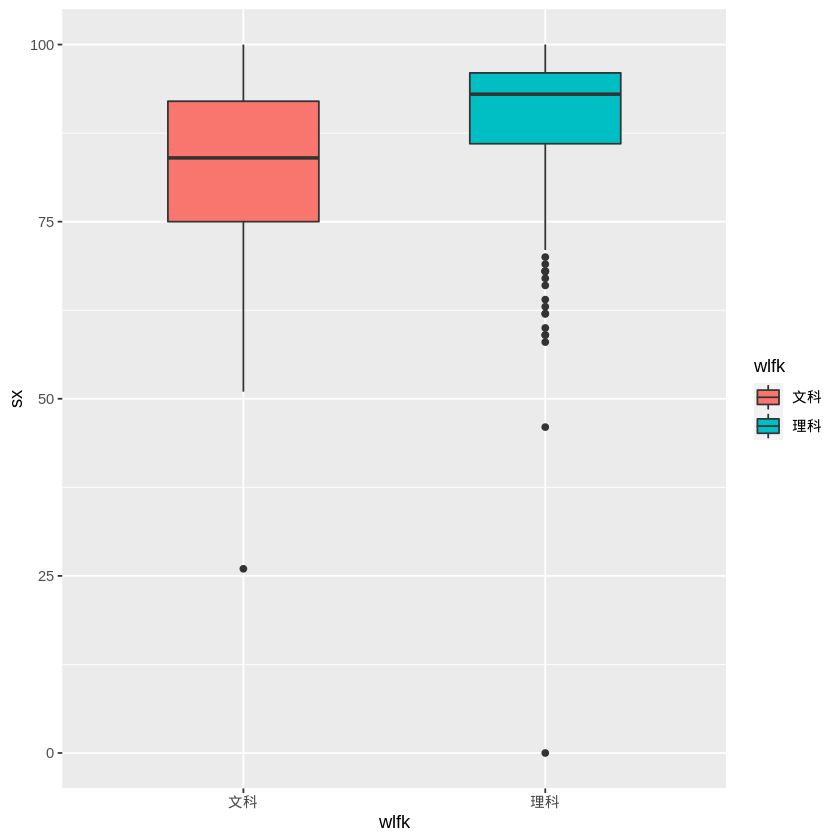

In [68]:
getwd()
#setwd("/root/linux_tutorial/")
cjb <- read.csv("data/cjb.csv",fileEncoding = "UTF-8")
head(cjb)
library("tidyverse")
cjb %>% 
    select(sx,wlfk) %>%
    ggplot(aes(x=wlfk,y=sx,fill=wlfk)) +
    geom_boxplot(width=0.5)

[1] "/root/linux_tutorial"

,xm,bj,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk
,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,周黎,1101,女,94,82,96,97,97,98,95,94,88,文科
2,汤海明,1101,男,87,94,89,95,94,94,90,90,89,文科
3,舒江辉,1101,男,92,79,86,98,95,96,89,94,87,文科
4,翁柯,1101,女,91,84,96,93,97,94,82,90,83,文科
5,祁强,1101,男,85,92,82,93,87,88,95,94,93,文科
6,湛容,1101,女,92,82,85,91,90,92,82,98,90,文科


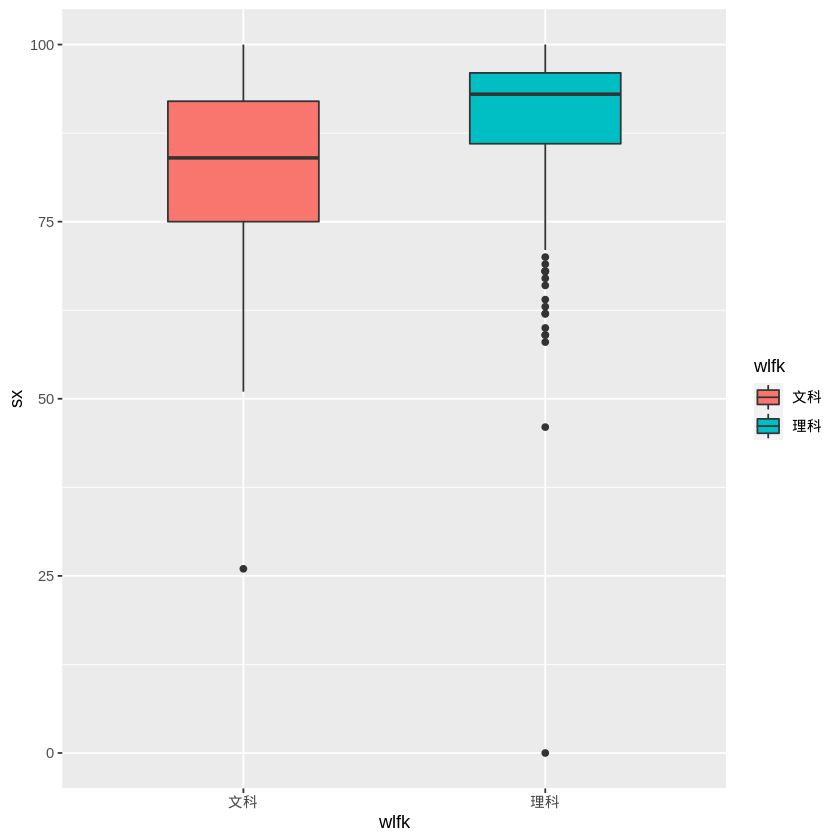

In [17]:

getwd()
#setwd("/root/linux_tutorial/")
cjb <- read.csv("data/cjb.csv",fileEncoding = "UTF-8")
head(cjb)
library("tidyverse")
#a1 <- "%>%"(cjb,select(sx,wlfk))  
 a1 <- select(cjb,sx,wlfk)
a2 <- "%>%"(a1,ggplot(aes(x=wlfk,y=sx,fill=wlfk)))
(a3 <- "+"(a2,geom_boxplot(width=0.5)))
    #ggplot(aes(x=wlfk,y=sx,fill=wlfk)) +
    #geom_boxplot(width=0.5)
#?select

In [45]:
cjb <- read.csv("data/cjb.csv",fileEncoding = "UTF-8")
library("tidyverse")


as_five_grade_score <- function(x){
    cut(x,breaks=c(0,seq(60,100,by=10)),labels=c("不及格","及格","中","良","优"))
}
# as_five_grade_score(cjb$sw)
cjb %<>%
     mutate(zcj = rowSums(.[4:12]))%>%
    filter(zcj!=0) %>% # 剔除脏数据
    mutate_at(vars(xb,wlfk),factor) %>% # 类型转换
    mutate_at(vars(yw,sw),as_five_grade_score) # 数据分箱
head(cjb)

,xm,bj,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk,zcj
,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
1,周黎,1101,女,优,82,96,97,97,98,95,94,良,文科,841
2,汤海明,1101,男,良,94,89,95,94,94,90,90,良,文科,822
3,舒江辉,1101,男,优,79,86,98,95,96,89,94,良,文科,816
4,翁柯,1101,女,优,84,96,93,97,94,82,90,良,文科,810
5,祁强,1101,男,良,92,82,93,87,88,95,94,优,文科,809
6,湛容,1101,女,优,82,85,91,90,92,82,98,良,文科,802


In [33]:
library(arulesViz)
my_model <- cjb %>%
    select(xb:wlfk) %>%
    apriori(parameter = list(supp = 0.06, conf = 0.8),
            appearance = list(rhs = paste0("wlfk=", c("文科", "理科"))))



plot(my_model, method = "graph")

Loading required package: arules

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid



ERROR: Error in cjb %>% select(xb:wlfk) %>% apriori(parameter = list(supp = 0.06, : could not find function "%>%"
